<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

## Subsurface Data Analytics 

## Introduction to Spacial Bias: Cell Size's Effect on Declustering Biased Spacial Data

#### Jesse Riedel, Undergraduate Student, The University of Texas at Austin

##### [LinkedIn](https://www.linkedin.com/in/jesse-riedel-12b311163/)

#### Supervised by:

#### Michael Pyrcz, Associate Professor, University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1) | [GeostatsPy](https://github.com/GeostatsGuy/GeostatsPy)


### PGE 383 Exercise: Cell Size Manipulation for Declustering Biased Data

Here's a simple workflow that demonstrates first, the concept of declustering in an effort to mitigate the potential bias of spacial data, and second, the effect that the choice of cell size can have on this concept of declustering.


#### Real Life Application

The concept of declustering can be very applicable in the oil and gas industry, or in general, any time there is a bias in gathered data over space. Some examples of use cases for declustering are:

* 3-D declustering data for horizontal or highly deviated wells
* Performing areal 2-D declustering for wells that are vertical or near vertical
* Declustering unconventional well data considering the fact that representativity can be an issue even with large datasets and relatively good coverage

#### Workflow Goals

Learn the basics of declustering and how cell size effects declustering. This includes:

* Loading and visualizing sample data
* Developing a basic understanding of declustering as a strategy to mitigate spatial bias
* Understanding the importance of cell size on declustered weights of spatial data

#### Getting Started

Here's the steps to get setup in Python with the GeostatsPy package:

1. Install Anaconda 3 on your machine (https://www.anaconda.com/download/). 
2. From Anaconda Navigator (within Anaconda3 group), go to the environment tab, click on base (root) green arrow and open a terminal. 
3. In the terminal type: pip install geostatspy. 
4. Open Jupyter and in the top block get started by copy and pasting the code block below from this Jupyter Notebook to start using the geostatspy functionality. 

You will need to copy the data file to your working directory.  They are available here:

* Tabular data - sample_data_biased.csv at https://git.io/fh0CW

There are exampled below with these functions. You can go here to see a list of the available functions, https://git.io/fh4eX, other example workflows and source code. 

In [7]:
import geostatspy.GSLIB as GSLIB          # GSLIB utilies, visualization and wrapper
import geostatspy.geostats as geostats    # GSLIB methods convert to Python

We will also need some standard packages. These should have been installed with Anaconda.

In [8]:
import numpy as np                        # ndarrys for gridded data
import pandas as pd                       # DataFrames for tabular data
import os                                 # set working directory, run executables
import matplotlib.pyplot as plt           # for plotting
from scipy import stats                   # summary statistics

Lastly, we need to import some packages that will allow us to create interactive functionality.

In [9]:
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual

#### Loading Tabular Data

Here's the command to load our comma delimited data file in to a Pandas' DataFrame object. 

In [10]:
df = pd.read_csv('sample_data_biased.csv')     # load our data table (wrong name!)

No error now! It worked, we loaded our file into our DataFrame called 'df'. But how do you really know that it worked? Visualizing the DataFrame would be useful and we already leard about these methods in this demo (https://git.io/fNgRW). 

We can preview the DataFrame by printing a slice or by utilizing the 'head' DataFrame member function (with a nice and clean format, see below). With the slice we could look at any subset of the data table and with the head command, add parameter 'n=13' to see the first 13 rows of the dataset. 

In [11]:
print(df.iloc[0:5,:])                   # display first 4 samples in the table as a preview
df.head(n=13)                           # we could also use this command for a table preview

     X    Y  Facies  Porosity       Perm
0  100  900       1  0.115359   5.736104
1  100  800       1  0.136425  17.211462
2  100  600       1  0.135810  43.724752
3  100  500       0  0.094414   1.609942
4  100  100       0  0.113049  10.886001


,X,Y,Facies,Porosity,Perm
0,100,900,1,0.115359,5.736104
1,100,800,1,0.136425,17.211462
2,100,600,1,0.135810,43.724752
3,100,500,0,0.094414,1.609942
4,100,100,0,0.113049,10.886001
5,200,800,1,0.154648,106.491795
6,200,700,1,0.153113,140.976324
7,200,500,1,0.126167,12.548074
8,200,400,0,0.094750,1.208561
9,200,100,1,0.150961,44.687430


#### Summary Statistics for Tabular Data

The table includes X and Y coordinates (meters), Facies 1 and 2 (1 is sandstone and 0 interbedded sand and mudstone), Porosity (fraction), and permeability as Perm (mDarcy). 

There are a lot of efficient methods to calculate summary statistics from tabular data in DataFrames. The describe command provides count, mean, minimum, maximum, and quartiles all in a nice data table. We use transpose just to flip the table so that features are on the rows and the statistics are on the columns.

In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
X,289.0,475.813149,254.277530,0.000000,300.000000,430.000000,670.000000,990.000000
Y,289.0,529.692042,300.895374,9.000000,269.000000,549.000000,819.000000,999.000000
Facies,289.0,0.813149,0.390468,0.000000,1.000000,1.000000,1.000000,1.000000
Porosity,289.0,0.134744,0.037745,0.058548,0.106318,0.126167,0.154220,0.228790
Perm,289.0,207.832368,559.359350,0.075819,3.634086,14.908970,71.454424,5308.842566


#### Specify the Area of Interest

It is natural to set the x and y coordinate and feature ranges manually. e.g. do you want your color bar to go from 0.05887 to 0.24230 exactly? Also, let's pick a color map for display. I heard that plasma is known to be friendly to the color blind as the color and intensity vary together (hope I got that right, it was an interesting Twitter conversation started by Matt Hall from Agile if I recall correctly). We will assume a study area of 0 to 1,000m in x and y and omit any data outside this area.

In [13]:
xmin = 0.0; xmax = 1000.0               # range of x values
ymin = 0.0; ymax = 1000.0               # range of y values
pormin = 0.05; pormax = 0.25;             # range of porosity values
cmap = plt.cm.plasma   

#### Declustering Biased Data

Declustering involves assigning a weight to each datum based on closeness to surrounding data. The first step of this process is to divide the volume of interest into a grid of cells, count the occupied cells and the number of datum in each cell. This can be illustrated through the following equation:

## \begin{equation}
w(u_j) = \frac{1}{n_l} \frac{n}{L_0}
\end{equation}

Where:

w = weight <br />
L<sub>0</sub> = number of occupied cells <br />
n = total number of data points <br />
n<sub>l</sub> = number of data in each cell <br />

The following cell contains an augmented version of the declus (declustering) function from the geostats module of GeostatsPy

In [24]:
def declus(df, xcol, ycol, vcol, iminmax, noff, ncell, cmin, cmax):
    """GSLIB's DECLUS program (Deutsch and Journel, 1998) converted from the
    original Fortran to Python by Michael Pyrcz, the University of Texas at
    Austin (Jan, 2019).
    Note this was simplified to 2D only.
    :param df: pandas DataFrame with the spatial data
    :param xcol: name of the x coordinate column
    :param ycol: name of the y coordinate column
    :param vcol: name of the property column
    :param iminmax: 1 / True: for use cell size with max decluster mean
                    0 / False: for declustered mean minimizing cell size
    :param noff: number of offsets
    :param ncell: number of cell sizes
    :param cmin: min cell size
    :param cmax: max cell size
    :return: TODO
    """
    # Load data and set up arrays
    #print(ncell)
    nd = len(df)
    x = df[xcol].values
    y = df[ycol].values
    v = df[vcol].values
    wt = np.zeros(nd)
    wtopt = np.ones(nd)
    index = np.zeros(nd, np.int32)
    xcs_mat = np.zeros(ncell + 2)  # we use 1,...,n for this array
    vrcr_mat = np.zeros(ncell + 2)  # we use 1,...,n for this array
    anisy = 1.0  # hard code the cells to 2D isotropic
    roff = float(noff)
 
    # Calculate extents
    xmin = np.min(x)
    xmax = np.max(x)
    ymin = np.min(y)
    ymax = np.max(y)
 
    # Calculate summary statistics
    vmean = np.mean(v)
    vstdev = np.std(v)
    vmin = np.min(v)
    vmax = np.max(v)
    xcs_mat[0] = 0.0
    vrcr_mat[0] = vmean
    vrop = vmean  # include the naive case
 
    print(f"There are {nd} data with:")
    print(f"   mean of      {vmean} ")
    print(f"   min and max  {vmin} and {vmax}")
    print(f"   standard dev {vstdev} ")
 
    # Define a "lower" origin to use for the cell sizes
    xo1 = xmin - 0.01
    yo1 = ymin - 0.01
 
    # Define the increment for the cell size
    xinc = (cmax - cmin) / ncell
    yinc = xinc
 
    # Loop over "ncell+1" cell sizes in the grid network
    ncellx = int((xmax - (xo1 - cmin)) / cmin) + 1
    ncelly = int((ymax - (yo1 - cmin * anisy)) / cmin) + 1
    #print(ncellx,ncelly)
    ncellt = ncellx * ncelly
    cellwt = np.zeros(ncellt)
    xcs = cmin - xinc
    ycs = (cmin * anisy) - yinc
 
    # Main loop over cell sizes
    # 0 index is the 0.0 cell, note n + 1 in Fortran
    add_cell = 2
#     if ncell > 1:
#         add_cell = 2
   
    for lp in range(1, ncell + add_cell):
        xcs = xcs + xinc
        ycs = ycs + yinc
       
#        print(xcs,ycs)
 
        # Initialize the weights to zero
        wt.fill(0.0)
 
        # Determine the maximum number of grid cells in the network
        ncellx = int((xmax - (xo1 - xcs)) / xcs) + 1
        ncelly = int((ymax - (yo1 - ycs)) / ycs) + 1
        ncellt = float(ncellx * ncelly)  # TODO: not used
 
        # Loop over all the origin offsets selected
        xfac = min((xcs / roff), (0.5 * (xmax - xmin)))
        yfac = min((ycs / roff), (0.5 * (ymax - ymin)))
        for kp in range(1, noff + 1):
            xo = xo1 - (float(kp) - 1.0) * xfac
            yo = yo1 - (float(kp) - 1.0) * yfac
 
            # Initialize the cumulative weight indicators
            cellwt.fill(0.0)
 
            # Determine which cell each datum is in
            for i in range(0, nd):
                icellx = int((x[i] - xo) / xcs) + 1
                icelly = int((y[i] - yo) / ycs) + 1
                icell = icellx + (icelly - 1) * ncellx - 1 # -1 for fortran to python
                index[i] = icell
                #print(i,x[i],y[i],icell)
                cellwt[icell] = cellwt[icell] + 1.0
 
            # The weight assigned to each datum is inversely proportional to the
            # number of data in the cell. We first need to get the sum of
            # weights so that we can normalize the weights to sum to one
            sumw = 0.0
            for i in range(0, nd):
                ipoint = index[i]
                sumw = sumw + (1.0 / cellwt[ipoint])
            sumw = 1.0 / sumw
 
            # Accumulate the array of weights (that now sum to one)
            for i in range(0, nd):
                ipoint = index[i]
                wt[i] = wt[i] + (1.0 / cellwt[ipoint]) * sumw
 
        # End loop over all offsets
 
        # Compute the weighted average for this cell size
        sumw = 0.0
        sumwg = 0.0
        for i in range(0, nd):
            sumw = sumw + wt[i]
            sumwg = sumwg + wt[i] * v[i]
        vrcr = sumwg / sumw
        vrcr_mat[lp] = vrcr
        xcs_mat[lp] = xcs
 
        # See if this weighting is optimal
        if iminmax and vrcr < vrop or not iminmax and vrcr > vrop or ncell == 1:
            best = xcs  # TODO: not used
            vrop = vrcr
            wtopt = wt.copy()  # deep copy
 
    # End main loop over all cell sizes
 
    # Get the optimal weights
    sumw = 0.0
    for i in range(0, nd):
        sumw = sumw + wtopt[i]
    wtmin = np.min(wtopt)  # TODO: not used
    wtmax = np.max(wtopt)  # TODO: not used
    facto = float(nd) / sumw
    wtopt = wtopt * facto
    return wtopt, xcs_mat, vrcr_mat

#### Changing Cell Size in Declustering

Now that the we have an implementation for declustering our biased data, we want to see the effect that the cell size parameter has on declustering the data.

In order to do this, we will be using ipywidgets. Ipywidgets offers interactive user interface elements like sliders, dropdown menus, and more. For this interactive workflow, we will be using a slider to change the cell size parameter of the declus (declustering) function.

Lastly, the @interact tag that is given to the interactive_cell_size function below is what allows the cell size slider to change the cell size parameter in the declus function call. This can be also be seen through the parameter of the interactive function being the instance of the slider itself.

The rest of the function below after the declus function call involves creating two plots, the left colored by the actual porosity data, and the right covered by the declustered weights, and how they are adjusted when the user changes the cell size.

In [23]:
@interact
def interactive_cell_size(cell_size = widgets.IntSlider(min = 10, max = 2000, step = 10, description='Cell Size:')):
    wts, cell_sizes, dmeans = declus(df,'X','Y','Porosity',iminmax = 1, noff= 10, ncell=1,cmin=cell_size,cmax=cell_size)
    
    df['Wts'] = wts
    
    f = plt.figure()
    
    f.set_figwidth(16)
    f.set_figheight(6)
    
    plt.subplot(1,2,1)
    GSLIB.locmap_st(df,'X','Y','Porosity',xmin,xmax,ymin,ymax,pormin,pormax,'Well Data - Porosity','X(m)','Y(m)','Porosity (fraction)',cmap)
    plt.subplot(1,2,2)   
    GSLIB.locmap_st(df,'X','Y','Wts',xmin,xmax,ymin,ymax,0.5,2.5,'Well Data Weights','X(m)','Y(m)','Weights',cmap)
    
    
    plt.tight_layout()

interactive(children=(IntSlider(value=10, description='Cell Size:', max=2000, min=10, step=10), Output()), _do…

As can be seen by the Well Data Weights plot on the right, when the cell size is adjusted, the weights of data points, illustrated by the color gradient shown on the right axis, change heavily.

#### Declustered Porosity Mean vs. Cell Size

The following portion of the workflow will give another perspective of the effect of declustering spatial data.

We will first call the declus function again, but this time we will set the cell sizes to vary between a wide range from 10m to 2,000m. This will allow the geostats.declus function to take the cell size that minimizes the declustered mean, denoted by the 'iminmax' parameter being set to 1 (setting this parameter will maximize the declustered mean).

In [35]:
df = pd.read_csv('sample_data_biased.csv')     # load our data table (wrong name!)
df['Wts'] = wts                            # add weights to the sample data DataFrame
wts, cell_sizes, dmeans = geostats.declus(df,'X','Y','Porosity',iminmax = 1, noff= 10, ncell=100,cmin=10,cmax=2000)

There are 289 data with:
   mean of      0.13474387540138408 
   min and max  0.058547873 and 0.228790002
   standard dev 0.03767982164385207 


We can now see the porosity mean pre-declustering and post-declustering, as well as the summary statistics as a result of the declustering:

In [37]:
por_mean = np.average(df['Porosity'].values)
por_dmean = np.average(df['Porosity'].values,weights=df['Wts'].values)
print('Porosity naive mean is ' + str(round(por_mean,3))+'.')
print('Porosity declustered mean is ' + str(round(por_dmean,3))+'.')
cor = (por_mean-por_dmean)/por_mean
print('Correction of ' + str(round(cor,4)) +'.')

print('\nSummary statistics of the declsutering weights:')
print(stats.describe(wts))

Porosity naive mean is 0.135.
Porosity declustered mean is 0.121.
Correction of 0.1002.

Summary statistics of the declsutering weights:
DescribeResult(nobs=289, minmax=(0.2819756671865989, 3.984325446814365), mean=0.9999999999999996, variance=0.40927076480664726, skewness=1.9395015754905447, kurtosis=4.287460624778004)



Lastly, we can look at a plot of the declustered porosity mean vs. the declustering cell size. It can be noted that at very large cell sizes the declustered mean is the naive mean.

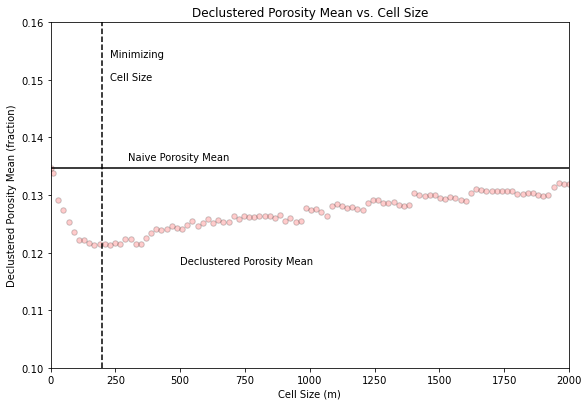

In [38]:
plt.subplot(111)
plt.scatter(cell_sizes,dmeans, s=30, alpha = 0.2, edgecolors = "black", facecolors = 'red')
plt.xlabel('Cell Size (m)')
plt.ylabel('Declustered Porosity Mean (fraction)')
plt.title('Declustered Porosity Mean vs. Cell Size')
plt.plot([0,2000],[por_mean,por_mean],color = 'black')
plt.plot([200,200],[0.10,0.16],color = 'black',linestyle='dashed')
plt.text(300., 0.136, r'Naive Porosity Mean')
plt.text(500., 0.118, r'Declustered Porosity Mean')
plt.text(230., 0.154, r'Minimizing')
plt.text(230., 0.150, r'Cell Size')
plt.ylim(0.10,0.16)
plt.xlim(0,2000)
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.2, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

#### Comments

This was an interactive workflow covering the basics cell size's effect on declustering spatially biased data. 

The Texas Center for Geostatistics has many other demonstrations on the basics of working with DataFrames, ndarrays, univariate statistics, plotting data, data transformations, trend modeling and many other workflows available [here](https://github.com/GeostatsGuy/PythonNumericalDemos), along with a package for geostatistics in Python called [GeostatsPy](https://github.com/GeostatsGuy/GeostatsPy). 
  
We hope this was helpful,

*Jesse* and *Michael*

***

#### More on Michael Pyrcz and the Texas Center for Data Analytics and Geostatistics:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin

#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)